## Simple Decision Tree(Regression Tree)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [5]:
df = pd.read_csv("Movie_collection_train.csv", header=0)

In [6]:
df.head(10)

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO
5,57400,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,Comedy,53,PG,460,YES
6,45800,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,Thriller,41,PG,522,YES
7,44200,22.8910,70.74,0.476,34285.460,169.6,6.980,7.075,6.875,7.170,7.96,400821,116.84,243.536,Drama,56,PG,571,NO
8,33000,24.2248,70.74,0.476,31280.205,173.5,6.910,7.075,6.850,7.000,7.96,295168,118.60,242.640,Comedy,55,PG,564,YES
9,37800,23.4008,70.74,0.476,33352.220,159.4,6.665,6.725,6.575,6.855,7.96,412012,189.56,283.024,Thriller,45,PG,508,YES


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

# Missing values Treatment.
Replace missing values with the mean value of the variable

In [10]:
mean_time_taken = df["Time_taken"].mean()

In [11]:
df["Time_taken"] = df["Time_taken"].fillna(mean_time_taken)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           400 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Avg_age_actors       400 non-null    int64  
 15  Num_multiplex        400 non-null    int

# Dummy Variable Creation
Converting all categorical variables into numerical variables by creating dummy variables

In [13]:
df.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO


In [14]:
df = pd.get_dummies(df, columns=["3D_available", "Genre", "MPAA_film_rating"], drop_first = True)

In [15]:
df.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


# Independent-dependent Variable Split
X-y Split

In [16]:
X = df.loc[:, df.columns!="Collection"]  # all rows and all columns except "Collection"

In [17]:
X.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [20]:
X.shape

(400, 19)

In [21]:
y = df["Collection"]

In [22]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [23]:
y.shape # the num of rows

(400,)

# Test-Train Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_train.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
336,20.6854,65.38,0.4850,32602.295,119.8,7.250,7.545,7.250,7.495,6.96,483878,201.80,303.120,53,447,0,0,0,1
64,20.3902,57.76,0.5839,39462.720,133.0,5.280,5.455,5.315,5.505,7.28,477265,165.20,205.280,30,390,1,0,0,0
55,20.2622,57.44,0.5970,40268.195,95.4,5.550,5.795,5.605,5.655,8.42,512329,150.16,265.664,50,480,1,0,0,1
106,23.4240,72.12,0.4800,32418.980,165.4,8.815,8.965,8.760,9.040,6.82,405008,205.80,283.120,20,482,1,0,1,0
300,20.8834,59.48,0.6000,38168.405,120.9,5.955,6.160,6.055,6.175,9.04,503113,181.92,223.968,29,429,1,0,0,1


In [27]:
X_train.shape

(320, 19)

In [28]:
X_test.shape

(80, 19)

# Training Regression Tree

In [29]:
from sklearn import tree

In [31]:
reg_tree = tree.DecisionTreeRegressor(max_depth=3)

In [32]:
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

Predict values of using trained model

In [33]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

In [34]:
y_test_pred

array([47146.66666667, 47146.66666667, 64866.66666667, 64866.66666667,
       47146.66666667, 47146.66666667, 37268.96551724, 91725.        ,
       37268.96551724, 37268.96551724, 47146.66666667, 37268.96551724,
       37268.96551724, 47146.66666667, 37268.96551724, 47146.66666667,
       47146.66666667, 37268.96551724, 37268.96551724, 64866.66666667,
       47146.66666667, 91725.        , 37268.96551724, 64866.66666667,
       47146.66666667, 47146.66666667, 37268.96551724, 47146.66666667,
       37268.96551724, 47146.66666667, 37268.96551724, 64866.66666667,
       47146.66666667, 91725.        , 47146.66666667, 47146.66666667,
       47146.66666667, 47146.66666667, 64866.66666667, 22834.7826087 ,
       47146.66666667, 47146.66666667, 47146.66666667, 47146.66666667,
       37268.96551724, 37268.96551724, 22834.7826087 , 47146.66666667,
       47146.66666667, 91725.        , 47146.66666667, 37268.96551724,
       47146.66666667, 47146.66666667, 91725.        , 47146.66666667,
      

# Calculate Model Performance

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
mean_squared_error(y_test, y_test_pred)

116554023.96381056

In [38]:
r2_score(y_train, y_train_pred)

0.8477196523486658

In [39]:
r2_score(y_test, y_test_pred)

0.6241422194036836

# Plotting Decision Tree

In [40]:
dot_data = tree.export_graphviz(reg_tree, out_file=None)

In [41]:
from IPython.display import Image

In [42]:
import pydotplus

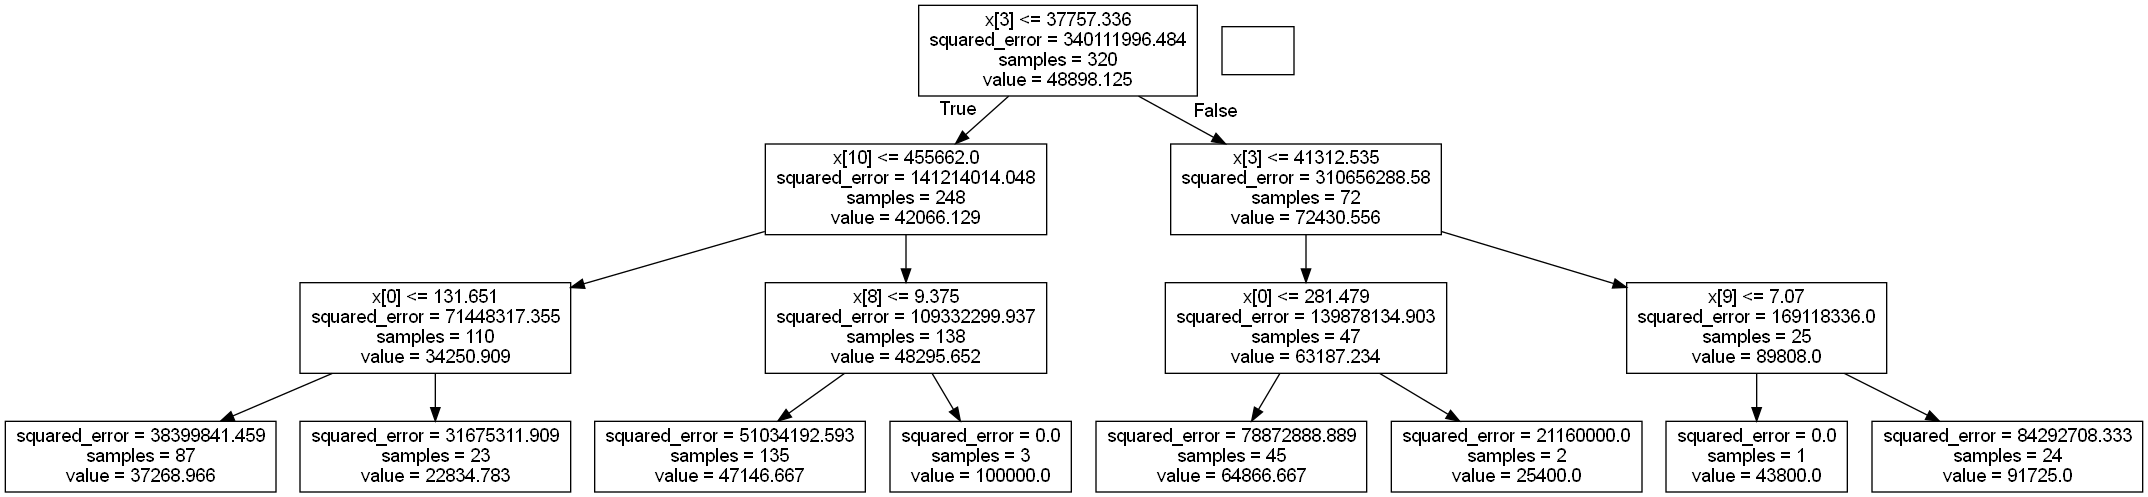

In [43]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Controlling Tree Growth

Maximum number of levels in tree

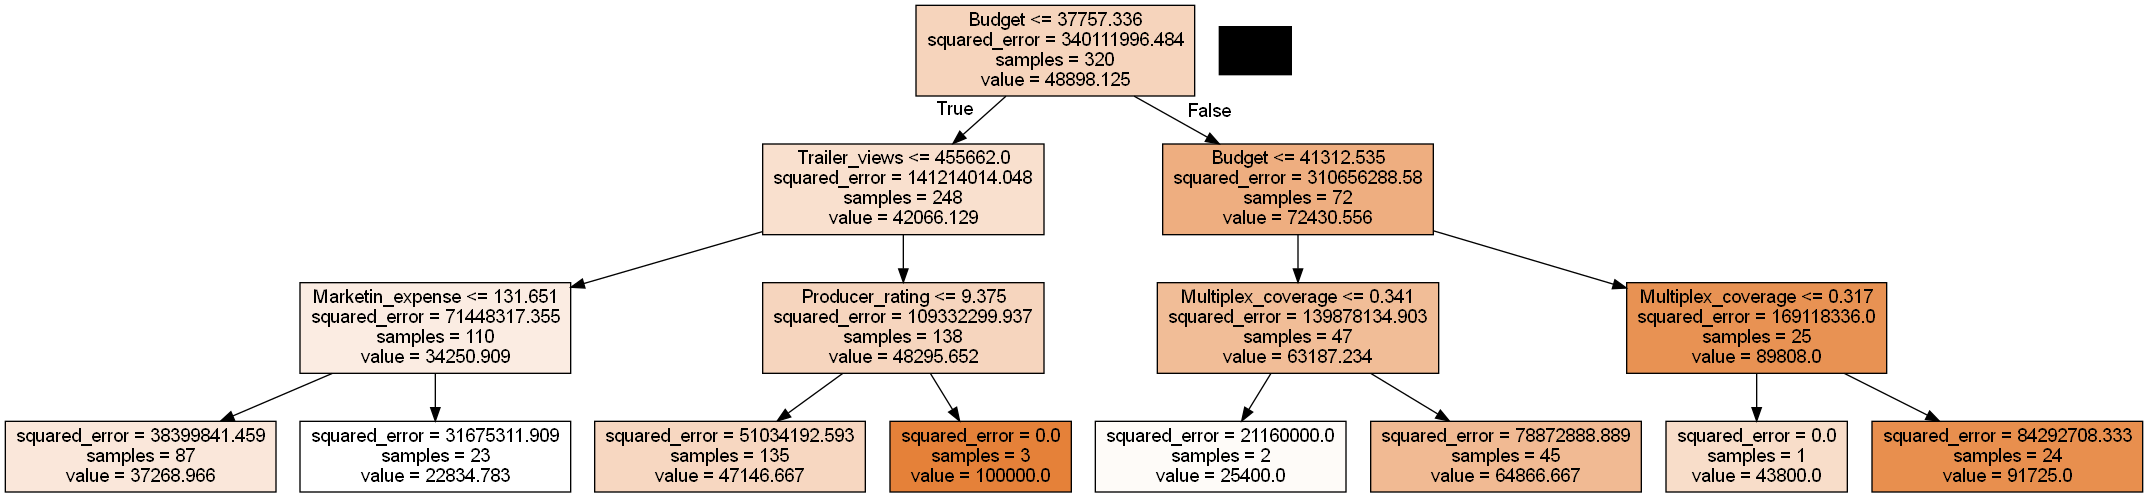

In [44]:
reg_tree1 = tree.DecisionTreeRegressor(max_depth=3)
reg_tree1.fit(X_train, y_train)
dot_data = tree.export_graphviz(reg_tree1, out_file=None, feature_names= X_train.columns, filled= True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())


Minimum Observation at Internal node. Number of observations per buckey in a split

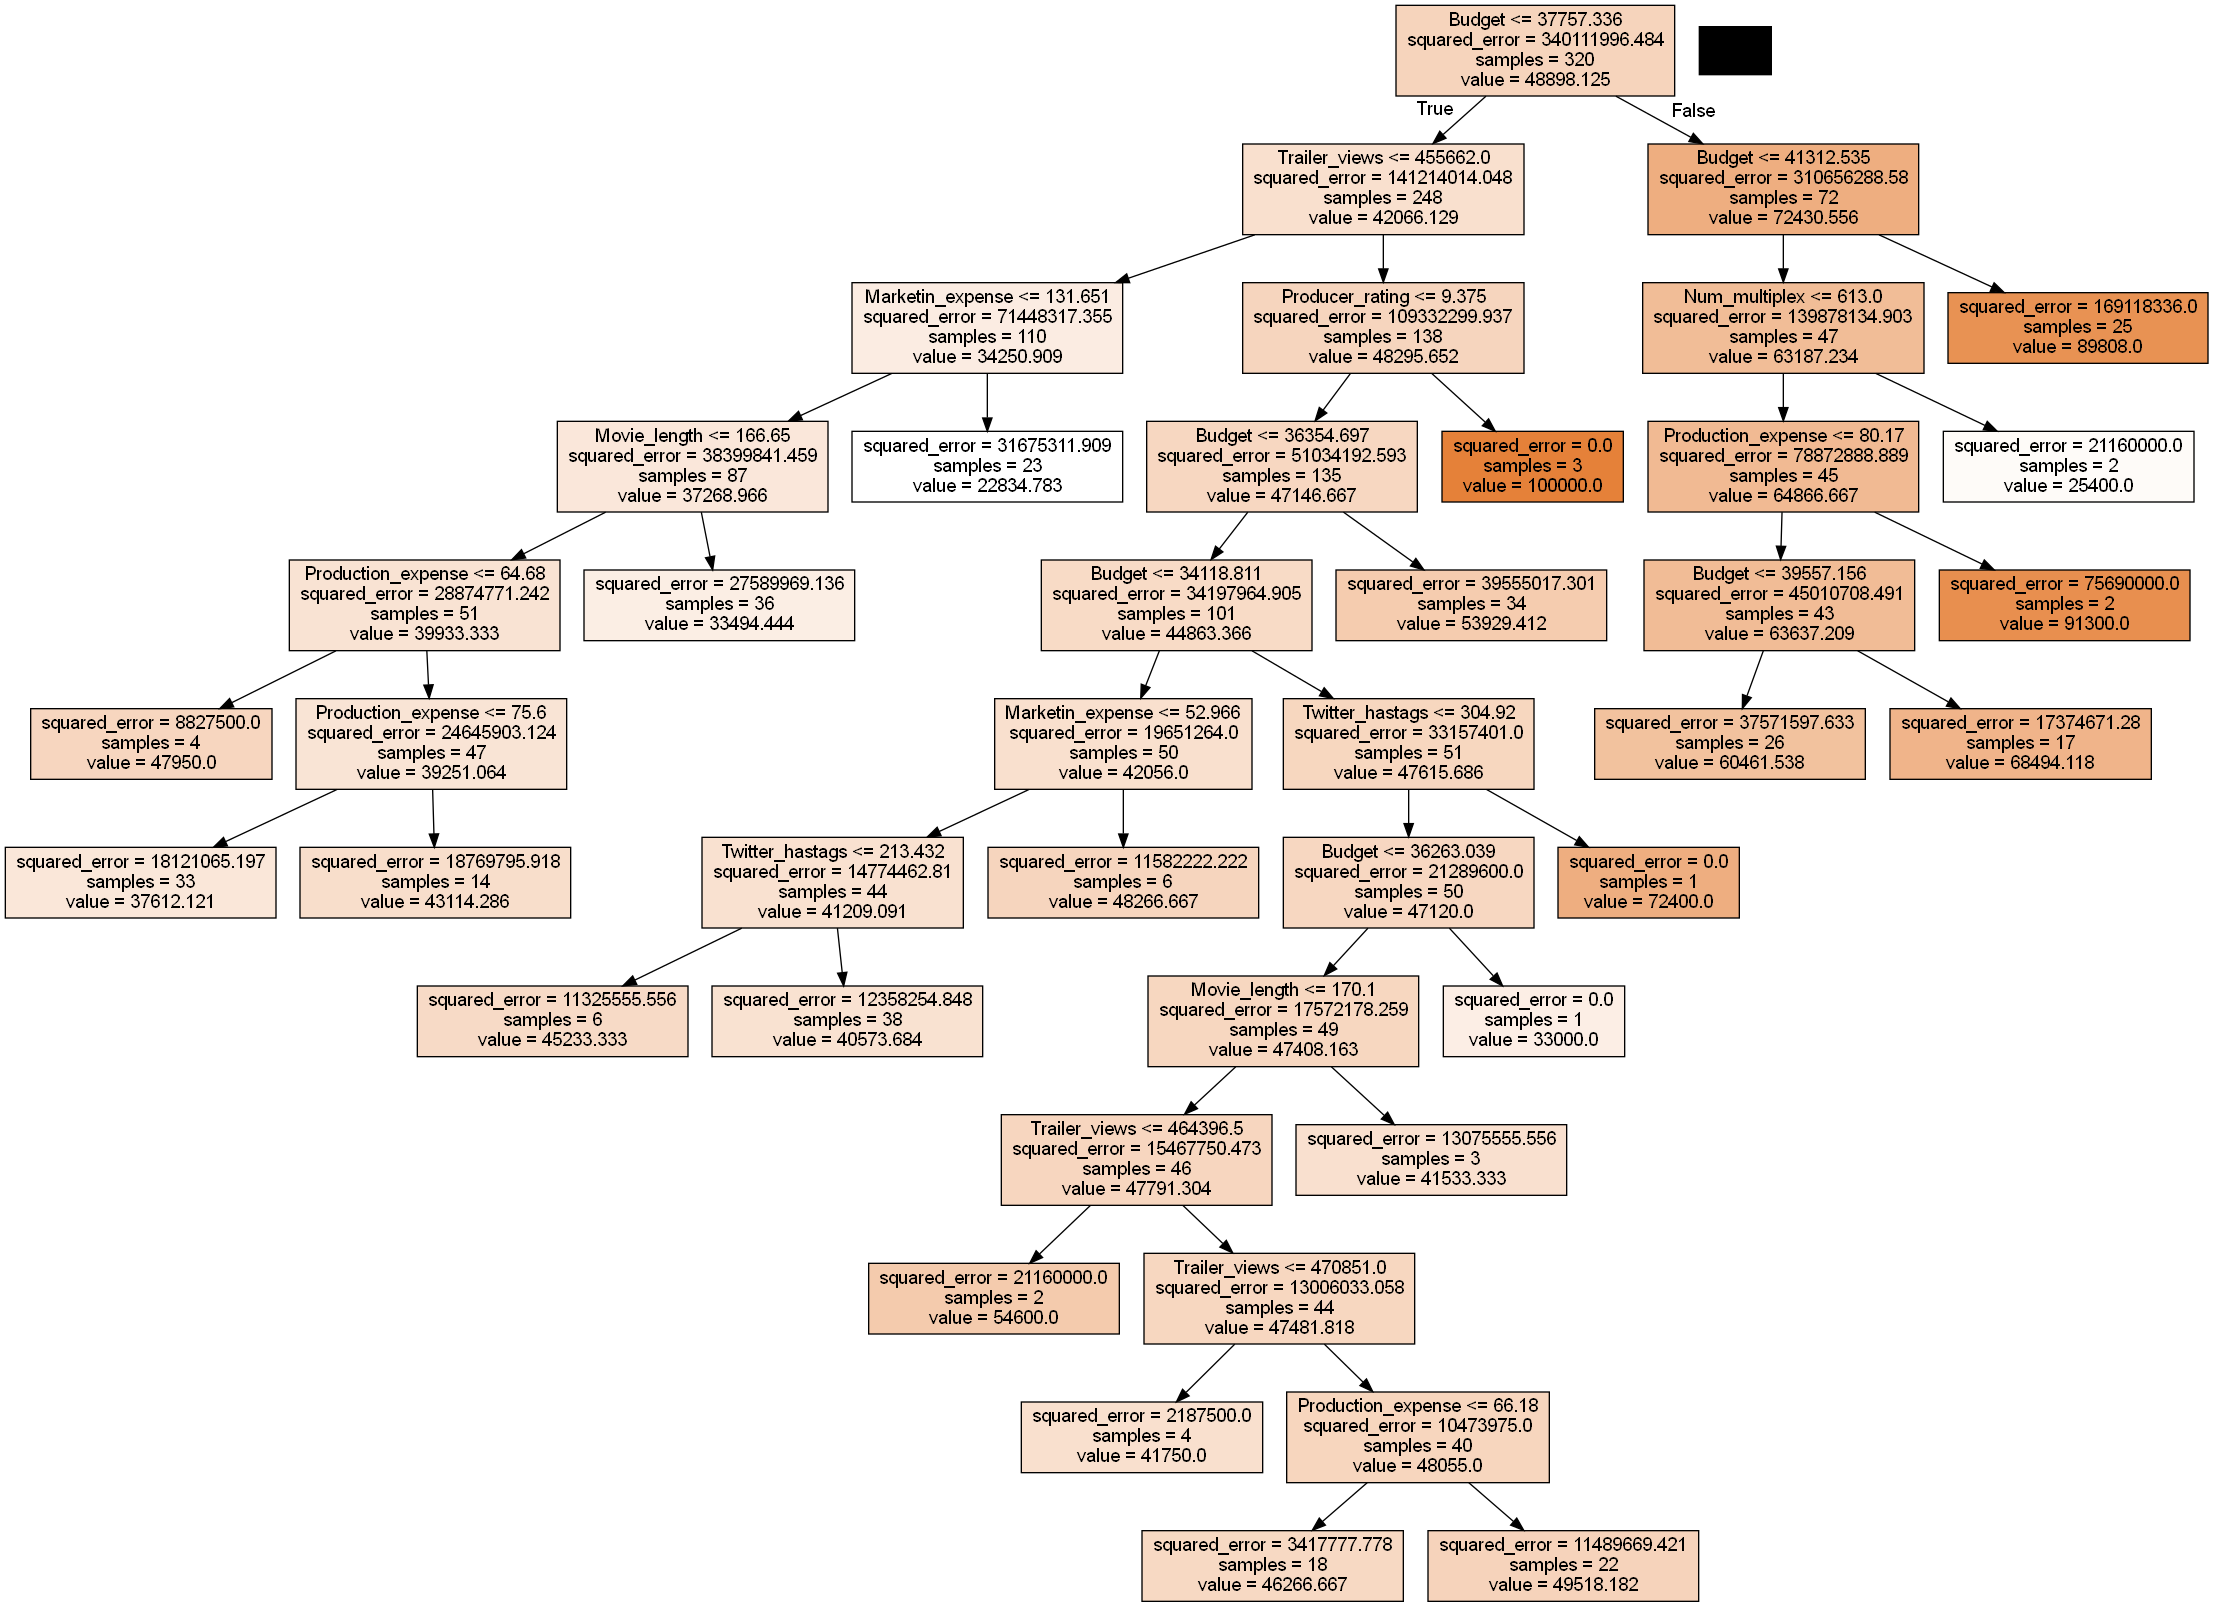

In [45]:
reg_tree2 = tree.DecisionTreeRegressor(min_samples_split= 40)
reg_tree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(reg_tree2, out_file=None, feature_names=X_train.columns, filled= True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

Minimum Observations at leaf node

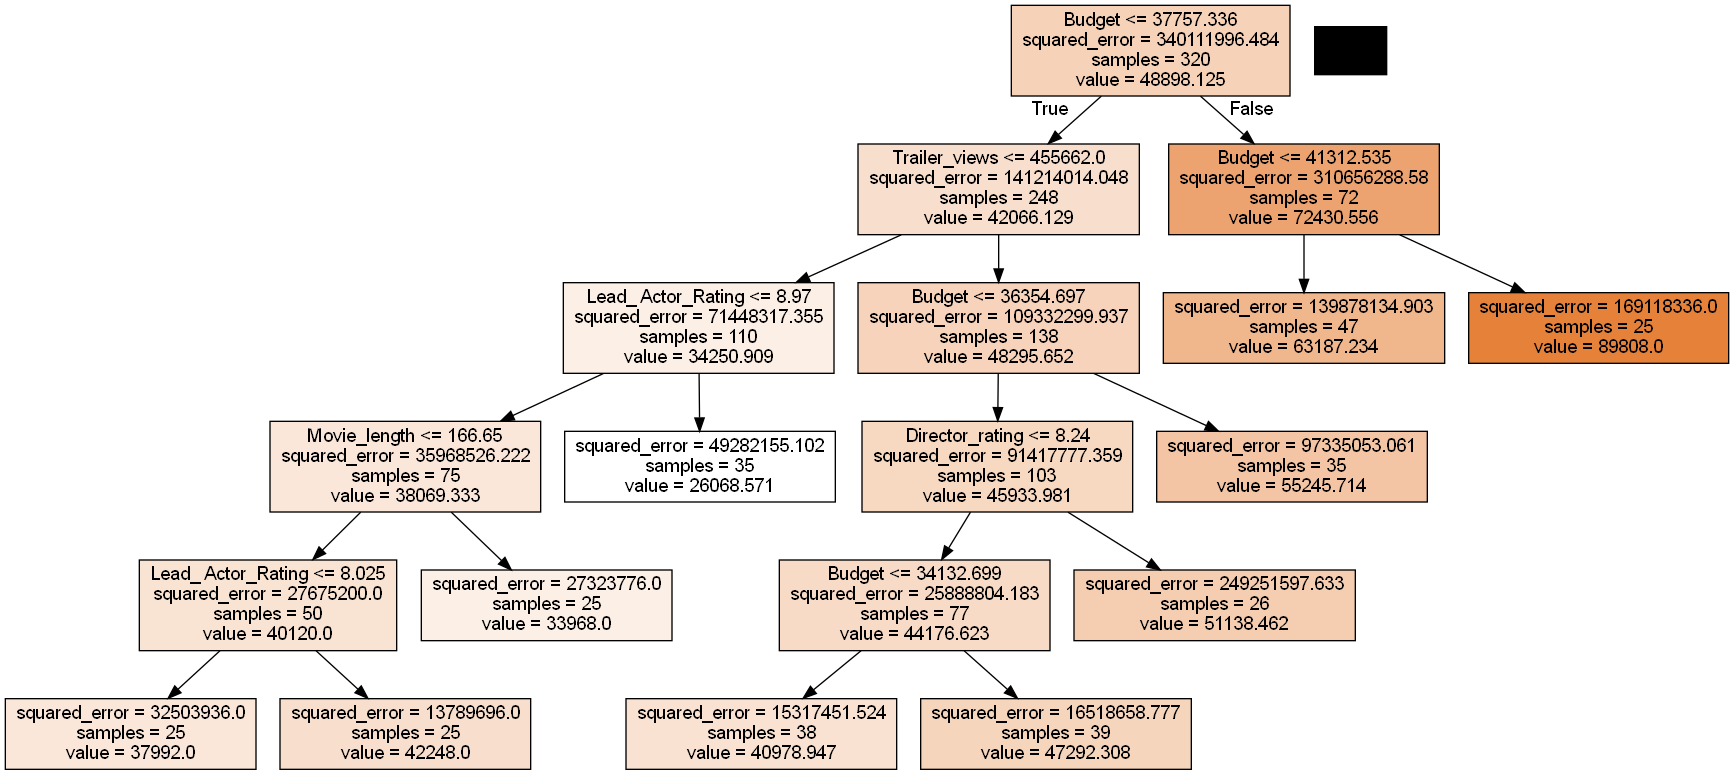

In [46]:
reg_tree3 = tree.DecisionTreeRegressor(min_samples_leaf= 25)
reg_tree3.fit(X_train, y_train)
dot_data = tree.export_graphviz(reg_tree3, out_file=None, feature_names=X_train.columns, filled= True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

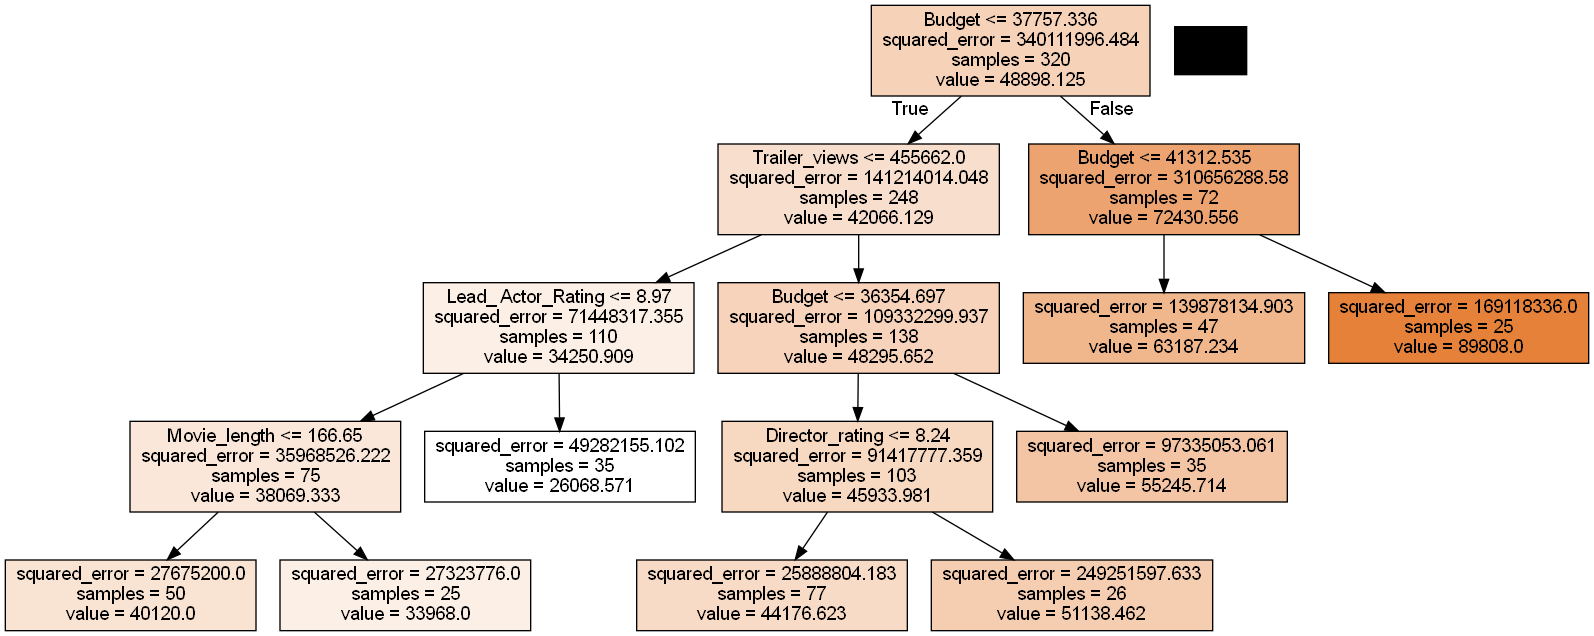

In [47]:
reg_tree4 = tree.DecisionTreeRegressor(min_samples_leaf= 25, max_depth=4)
reg_tree4.fit(X_train, y_train)
dot_data = tree.export_graphviz(reg_tree4, out_file=None, feature_names=X_train.columns, filled= True)
graph4 = pydotplus.graph_from_dot_data(dot_data)
Image(graph4.create_png())